In [1]:
import numpy as np
from scipy.stats import norm

Формулы вычисления p-value для различных вариантов критических областей:

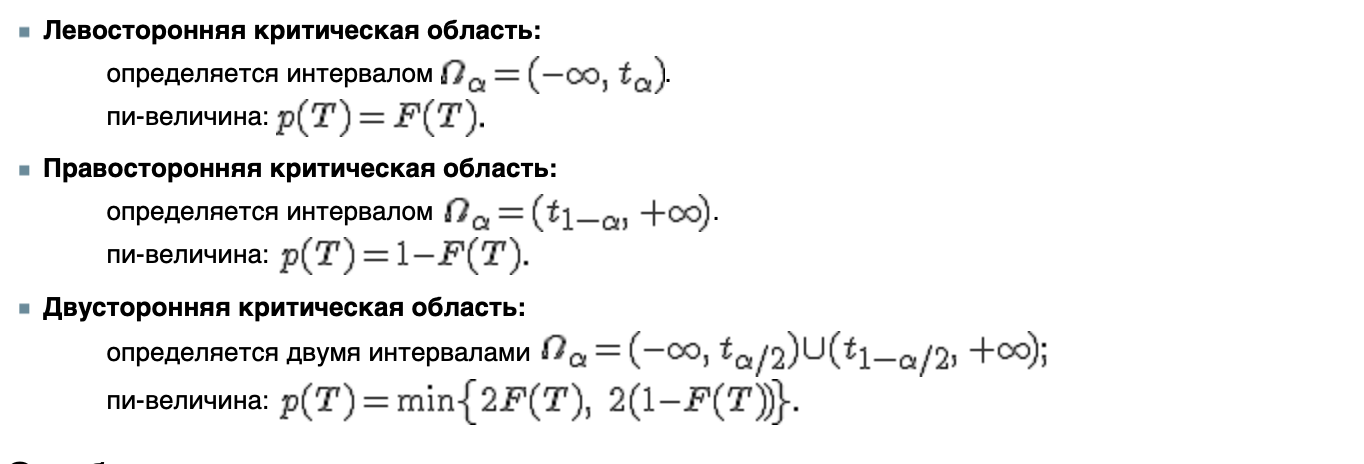

### Задача 1
Перед президентскими выборами  в городах Курске и Владивостоке был проведен социологический опрос. Каждый респондент должен был ответить на вопрос: «За какого кандидата вы будете голосовать на выборах?». В Курске опросили 105 человек, из них 42 ответили, что будут голосовать за кандидата А, во Владивостоке опросили 195 человек, из которых 65 за А. Можно ли считать на уровне значимости 0,05, что уровни поддержки кандидата А в Курске и Владивостоке одинаковы?

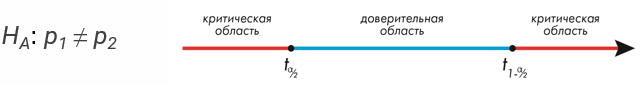

In [3]:
kn = 105
ka = 42
vn = 195
va = 65
alpha = 0.05

print('H0: pk = pv -уровни поддержки кандидата А в Курске и Владивостоке одинаковы')
print('HA: pk != pv -уровни поддержки кандидата А в Курске и Владивостоке разные\n')

p0 = (ka+va)/(kn+vn)
pk = ka/kn
pv = va/vn

# Статистика критерия
t = (pk-pv)/(p0*(1-p0)*(1/kn+1/vn))**0.5

# Границы доверительной области
tl = norm.ppf(alpha/2)
tr = norm.ppf(1-alpha/2)
print('На основаниии попадания статистики критерия в доверительную область H0 принимается:', (t > tl)&(t < tr))
print('Статистика критерия:', np.round(t, 3), '\t', 'Квантиль уровня альфа/2 и (1-альфа/2):', np.round(tl, 3), np.round(tr, 3), '\n')

# Значение p-value для двусторонней критической области
p_value = np.min([2 * norm.cdf(t), 2 * (1 - norm.cdf(t))])
print('На основании сравнения значения p-value с уровнем значимости alpha H0 принимается:', (p_value > alpha))
print('P-value:', np.round(p_value, 3))

H0: pk = pv -уровни поддержки кандидата А в Курске и Владивостоке одинаковы
HA: pk != pv -уровни поддержки кандидата А в Курске и Владивостоке разные

На основаниии попадания статистики критерия в доверительную область H0 принимается: True
Статистика критерия: 1.15 	 Квантиль уровня альфа/2 и (1-альфа/2): -1.96 1.96 

На основании сравнения значения p-value с уровнем значимости alpha H0 принимается: True
P-value: 0.25


**Ответ:** уровни поддержки кандидата А в Курске и Владивостоке одинаковы на уровне значимости alpha=0.05

### Задача 2.
Для изучения эффективности лекарства против аллергии обследовались две группы людей, предрасположенных к этому заболеванию. Результаты обследования следующие: среди принимавших лекарство заболело 3 человека, не заболело 172 человека; среди не  принимавших заболело 32 человека, не заболело 168. Указывают ли эти результаты на эффективность лекарства?

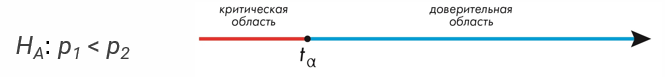

In [4]:
ill_1 = 3
healthy_1 = 172
ill_2 = 32
healthy_2 = 168
alpha = 0.05

print('H0: p1 = p2 -эффективность лекарства отсутствует')
print('HA: p1 < p2 -применение лекарства снижает уровень заболевания, лекарство эффективно\n')

n1 = ill_1 + healthy_1
n2 = ill_2 + healthy_2
p = (ill_1 + ill_2) / (n1 + n2)
p1 = ill_1 / n1
p2 = ill_2 / n2

# Статистика критерия
t = (p1 - p2) / (p * (1-p) * (1 / n1 + 1 / n2))**0.5

# Границы доверительной области
t_a = norm.ppf(alpha)
print('На основаниии попадания статистики критерия в доверительную область H0 принимается:', (t > t_a))
print('Статистика критерия:', np.round(t, 3), '\t', 'Квантиль уровня альфа:', np.round(t_a, 3), '\n')

# Значение p-value для левосторонней критической области
p_value = norm.cdf(t)
print('На основании сравнения значения p-value с уровнем значимости alpha H0 принимается:', (p_value > alpha))
print('P-value:', np.round(p_value, 3))

H0: p1 = p2 -эффективность лекарства отсутствует
HA: p1 < p2 -применение лекарства снижает уровень заболевания, лекарство эффективно

На основаниии попадания статистики критерия в доверительную область H0 принимается: False
Статистика критерия: -4.744 	 Квантиль уровня альфа: -1.645 

На основании сравнения значения p-value с уровнем значимости alpha H0 принимается: False
P-value: 0.0


**Ответ:** применение лекарства снижает уровень заболевания, лекарство эффективно на уровне значимости alpha=0.05

#### Задача 3
Было проведено обследование 10 горожан и 9 жителей села примерно одного возраста. Получены следующие данные об уровне давления:
для горожан: 130, 110, 120, 140, 200, 130, 140, 170, 160, 140;
для селян: 120, 190, 130, 160, 150, 120, 110, 120, 200.
Свидетельствуют ли эти данные в пользу того, что горожане имеют в среднем более высокое давление чем жители сельской местности?

In [5]:
x = [130, 110, 120, 140, 200, 130, 140, 170, 160, 140] # уровень давления горожан
y = [120, 190, 130, 160, 150, 120, 110, 120, 200] # уровень давления селян

'''
H0: tetha = 0 -средние давления горожан (1ая выборка x) и селян (2ая выборака y) одинаковые
HA: tetha < 0 -среднее давление селян ниже, а горожан выше
HA говорит о левосторонней критической области
левосторонняя кр. обл. => доверительная и критические области строятся по квантилю уровня alpha
'''

# Ранжирование двух выборок
total = x.copy()
total.extend(y)
total.sort()

total_dict = {}
for i, j in enumerate(total):
    if j not in total_dict.keys():
        total_dict[j] = [i + 1]
    else:
        total_dict[j].append(i + 1)
        
for key in total_dict.keys():
    total_dict[key] = np.mean(total_dict[key])
    
# Нахождение критерия Вилкоксона как сумма рангов 2ой выборки
w = 0
for elem in y:
    w += total_dict[elem]

# Расчет центрированного и нормированного критерия Вилкоксона
m = len(x)
n = len(y)

E_w = 0.5 * n * (m + n + 1)
D_w = (m * n * (m + n + 1))**2

w_ = (w - E_w)/(D_w)**0.5

# Расчет квантиля уровня альфа для левосторонней критической области
u_alpha = norm.ppf(0.05)
print('Статистика Вилкоксона попадает в доверительную область, и H0 принимается:', w_ > u_alpha)

# Расчет p-value для левосторонней критической области
p_value = norm.cdf(w_)
print('p-value больше уровня значимости альфа=0.05, и H0 принимается:', p_value > 0.05)

Статистика Вилкоксона попадает в доверительную область, и H0 принимается: True
p-value больше уровня значимости альфа=0.05, и H0 принимается: True


**Ответ:** средние давления горожан и селян не отличаются на уровне значимости alpha=0.05

#### Задача 4
Уровень гистамина в мокроте у 7 курильщиков, склонных к аллергии, составил в мг:
102,4	100,0	67,6	65,9	64,7	39,6	31,2
У 10 курильщиков не склонных к аллергии составил в мг:
48,1	45,5	41,7	35,4	29,1	18,9	58,3	68,8	71,3	94,3
Можно ли, основываясь на этих данных, считать с надёжностью 0,95 что уровень гистамина у склонных и не склонных к аллергии курильщиков значимо различается?

In [6]:
x = [102.4, 100.0, 67.6, 65.9, 64.7, 39.6, 31.2] # уровень гистамина у курильщиков-аллергиков
y = [48.1, 45.5, 41.7, 35.4, 29.1, 18.9, 58.3, 68.8, 71.3, 94.3] # уровень гистамина у курильщиков-не аллергиков
secr = 0.95

'''
H0: tetha = 0 -средние значения уровня гистамина у 2х выборок одинаковые
HA: tetha != 0 -среднее значения уровня гистамина отличаются
HA говорит о двусторонней критической области
двусторонняя кр. обл. => доверительная и критические области строятся по квантилю уровня alpha/2 и (1-alpha/2)
'''

alpha = 1 - secr
# Ранжирование двух выборок
total = x.copy()
total.extend(y)
total.sort()

total_dict = {}
for i, j in enumerate(total):
    if j not in total_dict.keys():
        total_dict[j] = [i + 1]
    else:
        total_dict[j].append(i + 1)
        
for key in total_dict.keys():
    total_dict[key] = np.mean(total_dict[key])
    
# Нахождение критерия Вилкоксона как сумма рангов 2ой выборки
w = 0
for elem in y:
    w += total_dict[elem]

# Расчет центрированного и нормированного критерия Вилкоксона
m = len(x)
n = len(y)

E_w = 0.5 * n * (m + n + 1)
D_w = (m * n * (m + n + 1))**2

w_ = (w - E_w)/(D_w)**0.5

# Расчет квантиля уровня альфа/2 для двусторонней критической области
ul = norm.ppf(alpha/2)

# Расчет квантиля уровня (1-alpha/2) для двусторонней критической области
ur = norm.ppf(1-alpha/2)
print('Статистика Вилкоксона попадает в доверительную область, и H0 принимается:', (w_ > ul)&(w_ < ur))

# Расчет p-value для двусторонней критической области
p_value = np.min([2 * norm.cdf(w_), 2 * (1 - norm.cdf(w_))])
print('p-value больше уровня значимости альфа=0.05, и H0 принимается:', p_value > alpha)

Статистика Вилкоксона попадает в доверительную область, и H0 принимается: True
p-value больше уровня значимости альфа=0.05, и H0 принимается: True


**Ответ:** уровень гистамина у склонных и не склонных к аллергии курильщиков значимо не различается с надежностью 0.95